In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os, shutil
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import zipfile
import os

zip_file_path = 'archive.zip'
extract_to_directory = 'extracted_files'
os.makedirs(extract_to_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print(f'Files extracted to {extract_to_directory}')



Files extracted to extracted_files


In [4]:

import pandas as pd

# Define paths to the Testing and Training folders
testing_folder = os.path.join(extract_to_directory, 'Testing')
training_folder = os.path.join(extract_to_directory, 'Training')

# List files in the Testing and Training folders
testing_files = os.listdir(testing_folder)
training_files = os.listdir(training_folder)

print("Testing files:", testing_files)
print("Training files:", training_files)

for file_name in testing_files:
    if file_name.endswith('.csv'):
        file_path = os.path.join(testing_folder, file_name)
        df = pd.read_csv(file_path)
        print(f'Read {file_name} from Testing folder')
        print(df.head())  # Display the first few rows of the dataframe

# Example: Read CSV files from the Training folder
# Replace 'example_train.csv' with the actual CSV filenames
for file_name in training_files:
    if file_name.endswith('.csv'):
        file_path = os.path.join(training_folder, file_name)
        df = pd.read_csv(file_path)
        print(f'Read {file_name} from Training folder')
        print(df.head())  # Display the first few rows of the dataframe


Testing files: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training files: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
import os

# Function to count images in subdirectories of a given directory
def count_images_in_folders(directory, image_extensions=['.png', '.jpg', '.jpeg']):
    folder_image_count = {}
    
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        image_count = 0
        
        # Count the number of image files in the current directory
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
        
        if image_count > 0:
            folder_image_count[folder_name] = image_count  # Store the count if there are any images

    return folder_image_count

# Define the path to the Training and Testing folders (from your previous code)
extract_to_directory = 'extracted_files'  # Directory where the zip was extracted
training_folder = os.path.join(extract_to_directory, 'Training')
testing_folder = os.path.join(extract_to_directory, 'Testing')

# Count images in the Training and Testing folders
training_image_counts = count_images_in_folders(training_folder)
testing_image_counts = count_images_in_folders(testing_folder)

# Print the image counts for each folder in Training and Testing directories
print("Training Folder Image Counts:")
for folder, count in training_image_counts.items():
    print(f"Folder: {folder}, Image Count: {count}")

print("\nTesting Folder Image Counts:")
for folder, count in testing_image_counts.items():
    print(f"Folder: {folder}, Image Count: {count}")

Training Folder Image Counts:
Folder: glioma, Image Count: 1321
Folder: meningioma, Image Count: 1339
Folder: notumor, Image Count: 1595
Folder: pituitary, Image Count: 1457

Testing Folder Image Counts:
Folder: glioma, Image Count: 300
Folder: meningioma, Image Count: 306
Folder: notumor, Image Count: 405
Folder: pituitary, Image Count: 300


In [8]:
import os
from PIL import Image

# Function to check and clean images
def check_and_clean_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    corrupted_files = []

    for image_file in image_files:
        try:
            with Image.open(os.path.join(folder_path, image_file)) as img:
                img.verify()  # Verify image integrity
        except (IOError, SyntaxError) as e:
            corrupted_files.append(image_file)
    
    return corrupted_files

# Define the path to the extracted directory
extract_to_directory = 'extracted_files'

# List of subfolder names (the different tumor categories)
subfolders = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Loop through both the 'Training' and 'Testing' directories
for dataset in ['Training', 'Testing']:
    print(f"\nChecking for corrupted files in '{dataset}' dataset:")

    # Loop through each subfolder (class folder within Training or Testing)
    for subfolder in subfolders:
        folder_path = os.path.join(extract_to_directory, dataset, subfolder)  # Path to the specific folder

        # Check for corrupted files in the current subfolder
        corrupted_files = check_and_clean_images(folder_path)

        # Print the result
        if corrupted_files:
            print(f"  Corrupted files in '{subfolder}' folder: {corrupted_files}")
        else:
            print(f"  No corrupted files in '{subfolder}' folder.")
            


Checking for corrupted files in 'Training' dataset:
  No corrupted files in 'glioma' folder.
  No corrupted files in 'meningioma' folder.
  No corrupted files in 'notumor' folder.
  No corrupted files in 'pituitary' folder.

Checking for corrupted files in 'Testing' dataset:
  No corrupted files in 'glioma' folder.
  No corrupted files in 'meningioma' folder.
  No corrupted files in 'notumor' folder.
  No corrupted files in 'pituitary' folder.



Processing images in 'Training' dataset:
Resizing and normalizing images in 'glioma' folder...
All images resized correctly in 'glioma' folder: True
All images normalized correctly in 'glioma' folder: True
Displaying sample images from 'glioma' folder...


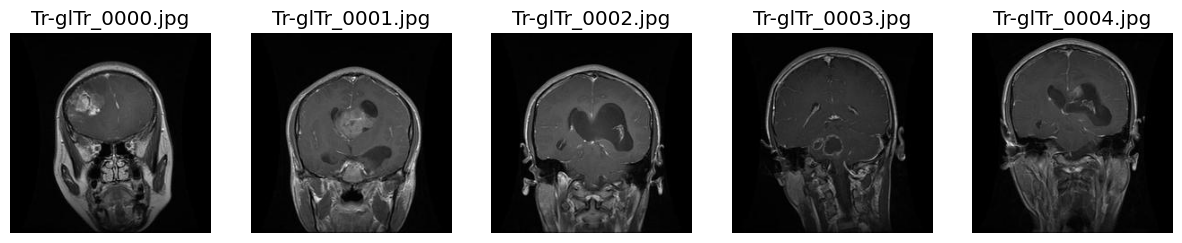

Resizing and normalizing images in 'meningioma' folder...
All images resized correctly in 'meningioma' folder: True
All images normalized correctly in 'meningioma' folder: True
Displaying sample images from 'meningioma' folder...


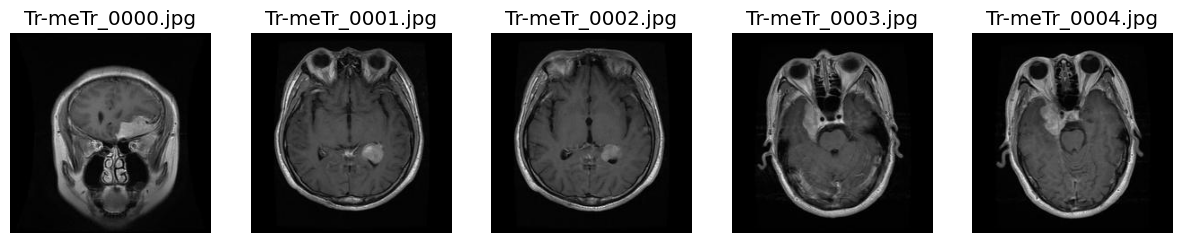

Resizing and normalizing images in 'notumor' folder...
Error processing Tr-no_1011.jpg at extracted_files\Training\notumor\Tr-no_1011.jpg: cannot write mode RGBA as JPEG
Error processing Tr-no_1019.jpg at extracted_files\Training\notumor\Tr-no_1019.jpg: cannot write mode RGBA as JPEG
Error processing Tr-no_1020.jpg at extracted_files\Training\notumor\Tr-no_1020.jpg: cannot write mode RGBA as JPEG
Error checking Tr-no_1011.jpg at extracted_files\Training\notumor\Tr-no_1011.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1011.jpg'
Error checking Tr-no_1019.jpg at extracted_files\Training\notumor\Tr-no_1019.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1019.jpg'
Error checking Tr-no_1020.jpg at extracted_files\Training\notumor\Tr-no_1020.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1020.jpg'
All images resized corre

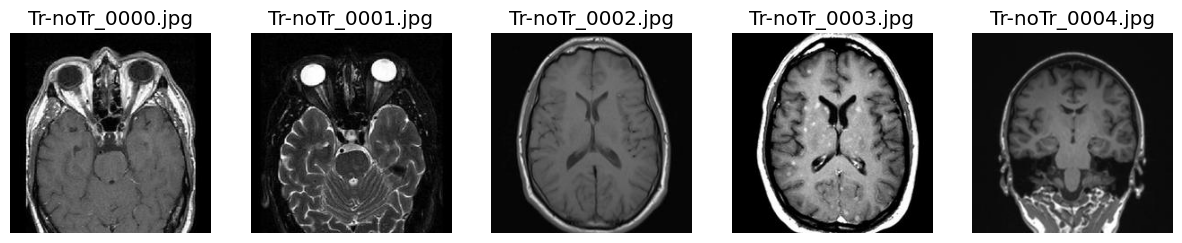

Resizing and normalizing images in 'pituitary' folder...
All images resized correctly in 'pituitary' folder: True
All images normalized correctly in 'pituitary' folder: True
Displaying sample images from 'pituitary' folder...


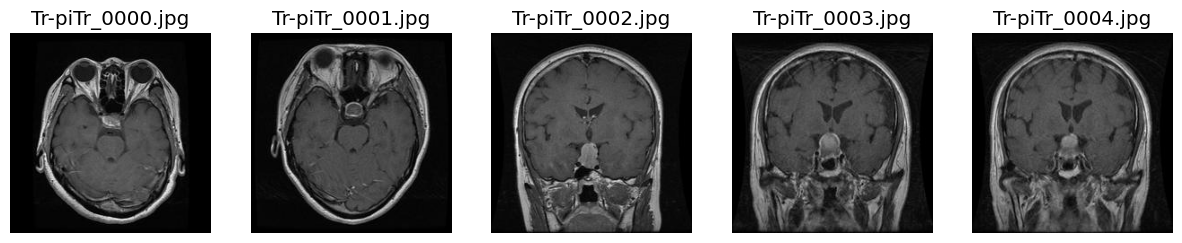


Processing images in 'Testing' dataset:
Resizing and normalizing images in 'glioma' folder...
All images resized correctly in 'glioma' folder: True
All images normalized correctly in 'glioma' folder: True
Displaying sample images from 'glioma' folder...


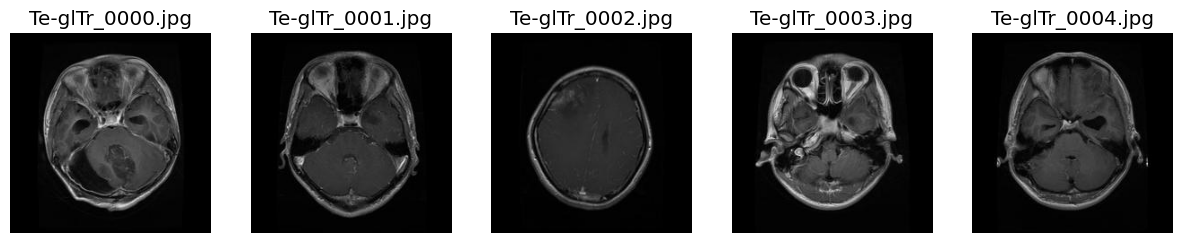

Resizing and normalizing images in 'meningioma' folder...
All images resized correctly in 'meningioma' folder: True
All images normalized correctly in 'meningioma' folder: True
Displaying sample images from 'meningioma' folder...


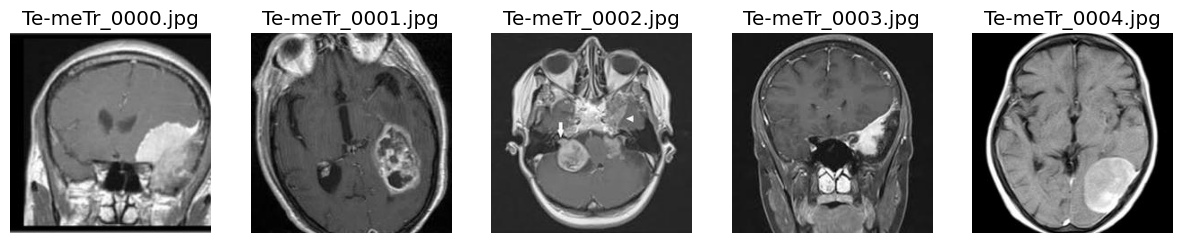

Resizing and normalizing images in 'notumor' folder...
All images resized correctly in 'notumor' folder: True
All images normalized correctly in 'notumor' folder: True
Displaying sample images from 'notumor' folder...


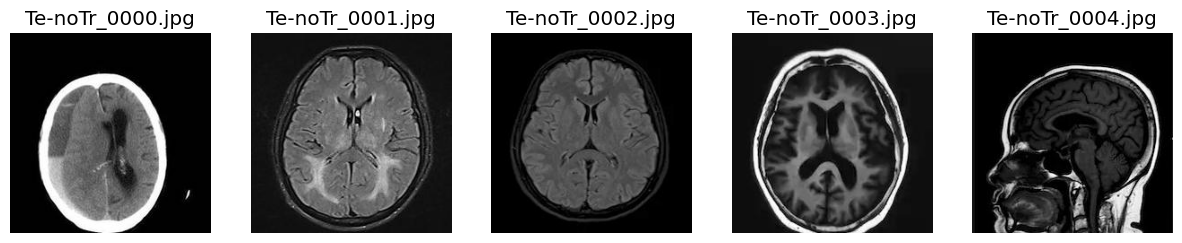

Resizing and normalizing images in 'pituitary' folder...
All images resized correctly in 'pituitary' folder: True
All images normalized correctly in 'pituitary' folder: True
Displaying sample images from 'pituitary' folder...


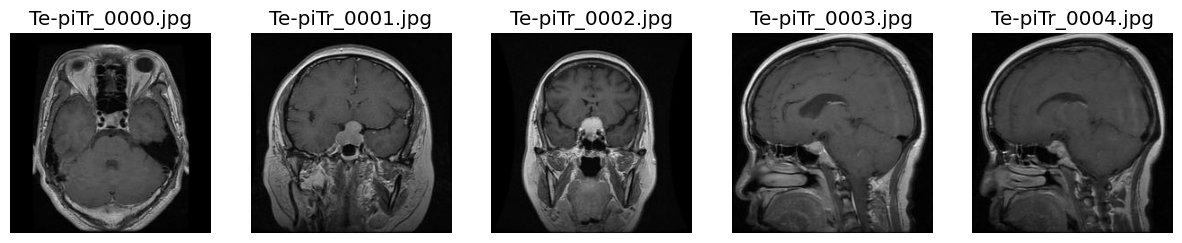

In [10]:
import os
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Function to resize and normalize images
def resize_and_normalize_images(folder_path, target_size=(224, 224)):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                # Resize and crop the image to fit the target size
                img = ImageOps.fit(img, target_size, method=Image.LANCZOS)
                # Normalize the image
                img = normalize_image(img)
                img.save(image_path)  # Save resized and normalized image
        except Exception as e:
            print(f"Error processing {image_file} at {image_path}: {e}")

# Function to normalize an image
def normalize_image(image):
    # Convert image to numpy array
    image_array = np.array(image)
    # Normalize pixel values to [0, 1]
    normalized_image_array = image_array / 255.0
    # Convert back to Image
    return Image.fromarray((normalized_image_array * 255).astype(np.uint8))

# Function to check image properties: resizing and normalization
def check_image_properties(folder_path, target_size=(224, 224)):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    all_resized = True
    all_normalized = True
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                # Check if the image is resized correctly
                if img.size != target_size:
                    print(f"Image {image_file} is not resized to {target_size}. Actual size: {img.size}")
                    all_resized = False
                
                # Check normalization by checking if pixel values are within the range [0, 255]
                image_array = np.array(img)
                if not np.all((image_array >= 0) & (image_array <= 255)):
                    print(f"Image {image_file} has pixel values out of range [0, 255].")
                    all_normalized = False
        except Exception as e:
            print(f"Error checking {image_file} at {image_path}: {e}")

    return all_resized, all_normalized

# Function to display sample images
def display_sample_images(folder_path, num_samples=5):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    sample_files = image_files[:num_samples]
    
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(sample_files):
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img)
                plt.title(f'{image_file}')
                plt.axis('off')
        except Exception as e:
            print(f"Error displaying {image_file} at {image_path}: {e}")
    plt.show()

# Define the path to the extracted directory
extract_to_directory = 'extracted_files'

# List of subfolders representing different tumor types
subfolders = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Loop through both the 'Training' and 'Testing' directories
for dataset in ['Training', 'Testing']:
    print(f"\nProcessing images in '{dataset}' dataset:")

    # Loop through each subfolder (class folder within Training or Testing)
    for subfolder in subfolders:
        folder_path = os.path.join(extract_to_directory, dataset, subfolder)  # Path to the specific folder

        # Resize and normalize images
        print(f"Resizing and normalizing images in '{subfolder}' folder...")
        resize_and_normalize_images(folder_path)

        # Check if resizing and normalization were successful
        all_resized, all_normalized = check_image_properties(folder_path)
        print(f"All images resized correctly in '{subfolder}' folder: {all_resized}")
        print(f"All images normalized correctly in '{subfolder}' folder: {all_normalized}")

        # Optionally display sample images to verify visually
        print(f"Displaying sample images from '{subfolder}' folder...")
        display_sample_images(folder_path)

Error with file extracted_files/Training\notumor\Tr-no_1011.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1011.jpg'
Invalid image file found and removed: extracted_files/Training\notumor\Tr-no_1011.jpg
Error with file extracted_files/Training\notumor\Tr-no_1019.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1019.jpg'
Invalid image file found and removed: extracted_files/Training\notumor\Tr-no_1019.jpg
Error with file extracted_files/Training\notumor\Tr-no_1020.jpg: cannot identify image file 'C:\\Users\\lenovo\\Downloads\\extracted_files\\Training\\notumor\\Tr-no_1020.jpg'
Invalid image file found and removed: extracted_files/Training\notumor\Tr-no_1020.jpg
Found 4569 images belonging to 4 classes.
Found 1140 images belonging to 4 classes.


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.3681 - loss: 1.3302 - val_accuracy: 0.5456 - val_loss: 1.1144
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6341 - loss: 0.8533 - val_accuracy: 0.6868 - val_loss: 0.9172
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7031 - loss: 0.7113 - val_accuracy: 0.7114 - val_loss: 0.8387
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7446 - loss: 0.6116 - val_accuracy: 0.7368 - val_loss: 0.7777
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7710 - loss: 0.5804 - val_accuracy: 0.7351 - val_loss: 0.7305
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.7846 - loss: 0.5386 - val_accuracy: 0.7360 - val_loss: 0.6800
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8118 - loss: 0.4996 - val_accuracy: 0.7632 - val_loss: 0.6494
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8236 - loss: 0.4613 - 

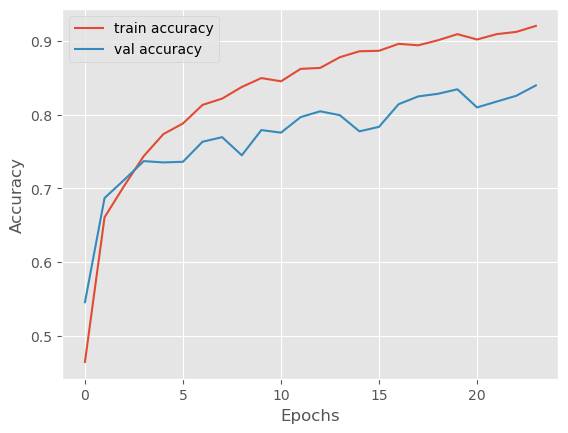

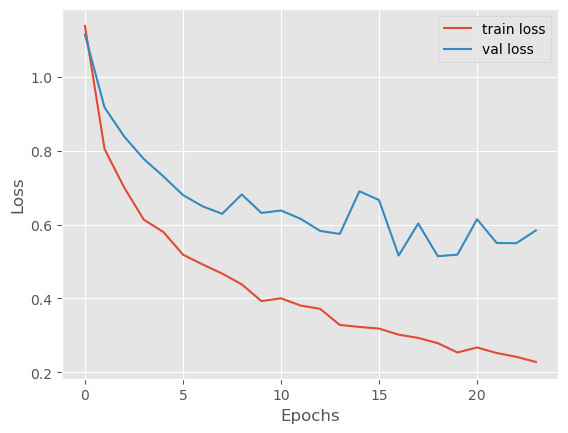

In [33]:

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Paths to your dataset (change paths to the correct ones)
train_directory = 'extracted_files/Training'
test_directory = 'extracted_files/Testing'

# Function to check if an image file is valid
def is_image_file(filepath):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
    if not filepath.lower().endswith(tuple(valid_extensions)):
        print(f"File {filepath} is not a supported image file.")
        return False

    try:
        with Image.open(filepath) as img:
            img.verify()  # Verifies image integrity
        return True
    except (IOError, SyntaxError, UnidentifiedImageError) as e:
        print(f"Error with file {filepath}: {str(e)}")
        return False

# Check and log valid images in the training directory
def validate_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            if not is_image_file(filepath):
                print(f"Invalid image file found and removed: {filepath}")
                os.remove(filepath)  # Remove corrupted or unsupported image

# Run the validation function to filter out invalid images
validate_images(train_directory)

# Data augmentation and preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Specify the validation split
)

# Create a data generator for training data
train_data_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    color_mode='rgb',  # Use 'grayscale' if working with grayscale images
    batch_size=32,
    class_mode='sparse',
    subset='training'  # Use the training subset
)

# Create a data generator for validation data
val_data_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    color_mode='rgb',  # Use 'grayscale' if working with grayscale images
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Use the validation subset
)

# Building the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))  # 3 for RGB channels
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 4 classes (for glioma, meningioma, notumor, pituitary)
model.add(Dense(4, activation='softmax'))  # Change to 4 output units for 4 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crosentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data_generator,
    epochs=100,
    validation_data=val_data_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, acc = model.evaluate(val_data_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

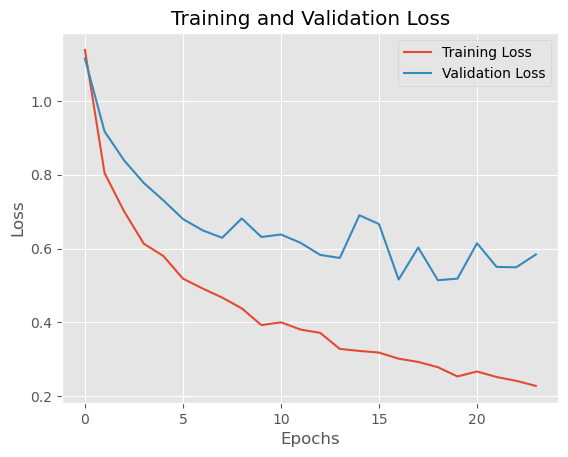

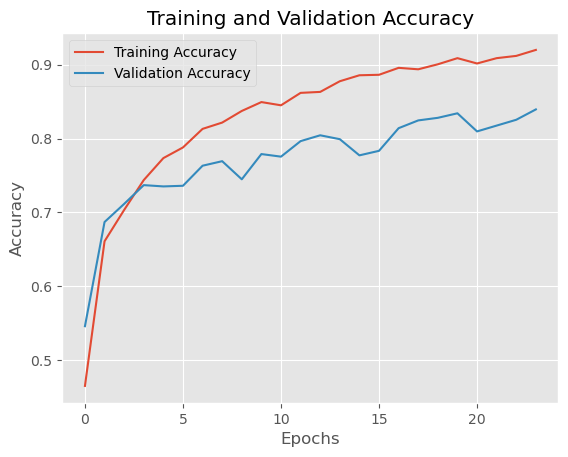

143/143 ━━━━━━━━━━━━━━━━━━━━ 101s 708ms/step - accuracy: 0.9367 - loss: 0.1805
Accuracy on Train Data: 0.9348
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 490ms/step - accuracy: 0.8472 - loss: 0.4774
Accuracy on Test Data: 0.8272
Model saved successfully as 'my_cnn_model.keras'


In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Plotting the Loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting the Accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on training data
train_loss, train_acc = model.evaluate(train_data_generator)
print(f"Accuracy on Train Data: {train_acc:.4f}")

# Evaluate the model on validation (test) data
val_loss, val_acc = model.evaluate(val_data_generator)
print(f"Accuracy on Test Data: {val_acc:.4f}")

# Save the trained CNN model
model.save("my_cnn_model.keras")
print("Model saved successfully as 'my_cnn_model.keras'")

In [53]:
# Save the model as .h5
model.save('model.h5')


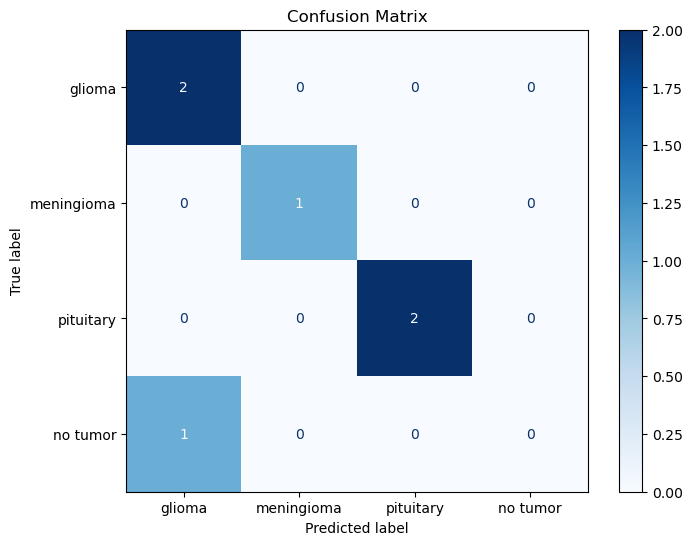

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Replace with your actual true labels and predictions
true_class_names = ['glioma', 'meningioma', 'pituitary', 'no tumor', 'glioma', 'pituitary']  # Replace with actual true labels
predicted_class_names = ['glioma', 'meningioma', 'pituitary', 'glioma', 'glioma', 'pituitary']  # Replace with model predictions

# Define class mapping
class_mapping = {'glioma': 0, 'meningioma': 1, 'pituitary': 2, 'no tumor': 3}

# Convert class names to numeric labels
true_labels = [class_mapping[label] for label in true_class_names]
predictions = [class_mapping[label] for label in predicted_class_names]

# Define the class labels and their order
labels = [0, 1, 2, 3]
display_labels = ['glioma', 'meningioma', 'pituitary', 'no tumor']

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()
